In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-full-version1/bank-full.csv
/kaggle/input/bank-01/bank.csv
/kaggle/input/.sav/scikitlearn/default/1/final_model.sav


# **Bank Marketing Campaign- Analysis and Model Deployment**

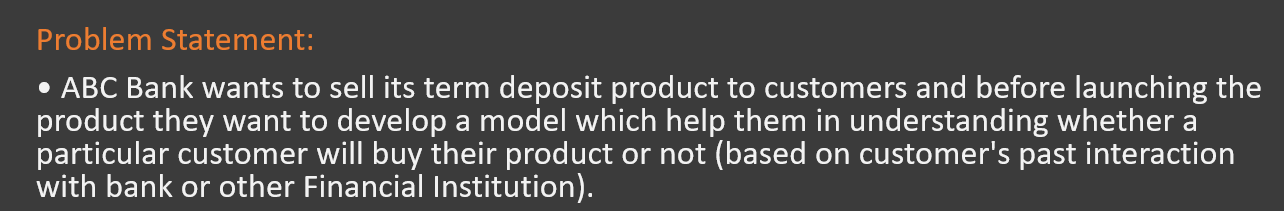

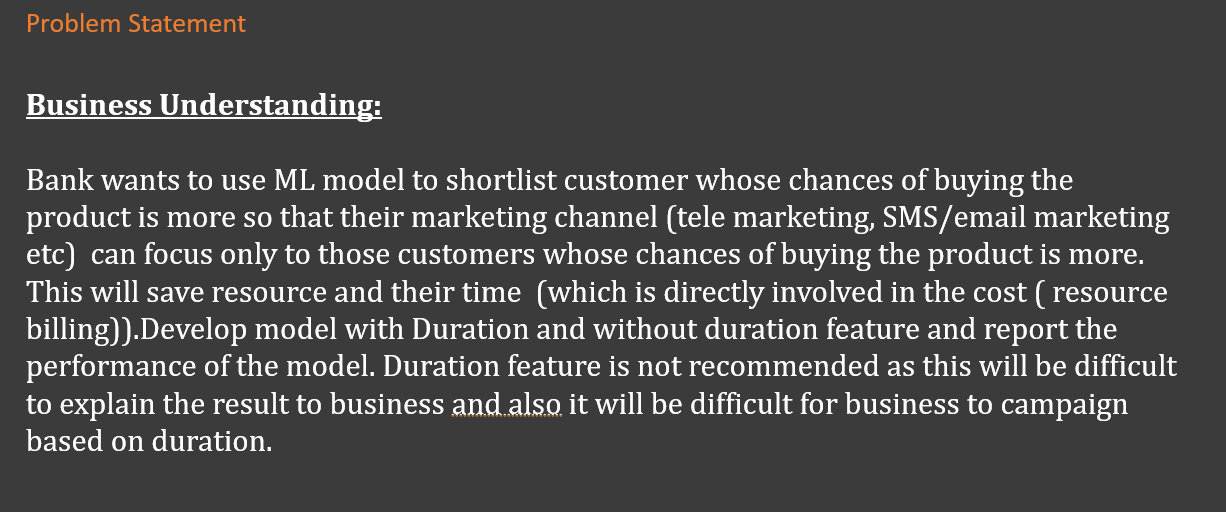

# **Data Pre-Processing**

# Steps of preprocessing of data

*  Import necessary library
*  Read Dataset
*  sanity check of dataStep
*  Exploratory Data Analysis (EDA)
*  Missing Value findings
*  Outliers findings
*  Duplicate Findings
*  Normalization
*  Encoding of Data



# Exploratory Data Analysis
* **Using Pandas for basic statistics,summary, and descriptive analysis.**
* **Create histograms,boxplots,scatter plots, and other visualization to understand data distribution and relationships.**
* **Identify outliers and anomalies that migth affect analysis.**
  


 #  **Importing Necessary Libraries**

 Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 # **Reading Dataset**

In [4]:
Bank_data = pd.read_csv("/kaggle/input/bank-full-version1/bank-full.csv")

In [5]:
import pandas as pd


Bank_data = pd.read_csv('/kaggle/input/bank-full-version1/bank-full.csv')

# Display column names
print(Bank_data.columns)


Index(['sl. no', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')


In [6]:
Bank_data.head()

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
Bank_data

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
Bank_data.isna().sum()

sl. no       0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#  **Sanity Check**

In [9]:
Bank_data.shape


(45211, 18)

In [10]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sl. no     45211 non-null  int64 
 1   age        45211 non-null  int64 
 2   job        45211 non-null  object
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   default    45211 non-null  object
 6   balance    45211 non-null  int64 
 7   housing    45211 non-null  object
 8   loan       45211 non-null  object
 9   contact    45211 non-null  object
 10  day        45211 non-null  int64 
 11  month      45211 non-null  object
 12  duration   45211 non-null  int64 
 13  campaign   45211 non-null  int64 
 14  pdays      45211 non-null  int64 
 15  previous   45211 non-null  int64 
 16  poutcome   45211 non-null  object
 17  y          45211 non-null  object
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


# Data Cleaning

# Handle Duplicates

# Remove duplicates


In [11]:
Bank_data = Bank_data.drop_duplicates()
Bank_data

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Handle missing values

In [12]:
# Check for missing values 
print(Bank_data.isnull().sum())

sl. no       0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [13]:
# Identifying garbage values
for i in Bank_data.select_dtypes(include='object').columns:
    print(Bank_data[i].value_counts())
    print("***" * 10)


job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
******************************
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
******************************
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
******************************
default
no     44396
yes      815
Name: count, dtype: int64
******************************
housing
yes    25130
no     20081
Name: count, dtype: int64
******************************
loan
no     37967
yes     7244
Name: count, dtype: int64
******************************
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64
******************************
month
may    13766
ju

In [14]:
# Finding Missing values percentage
missing_percentage = (Bank_data.isnull().sum() / len(Bank_data)) * 100
print(missing_percentage)

sl. no       0.0
age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64


In [15]:
Bank_data.isna().sum()

sl. no       0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# **Exploratory Data Analysis (EDA)**

In [16]:
# importing the external libraries
import pandas as pd

# importing the data
Bank_data=pd.read_csv("/kaggle/input/bank-full-version1/bank-full.csv")


# Descriptive Statistics of the Numerical Column

In [17]:
Bank_data.describe()

,sl. no,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,1.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Descriptive Statistics of the object column

Bank_data.describe(include='object')


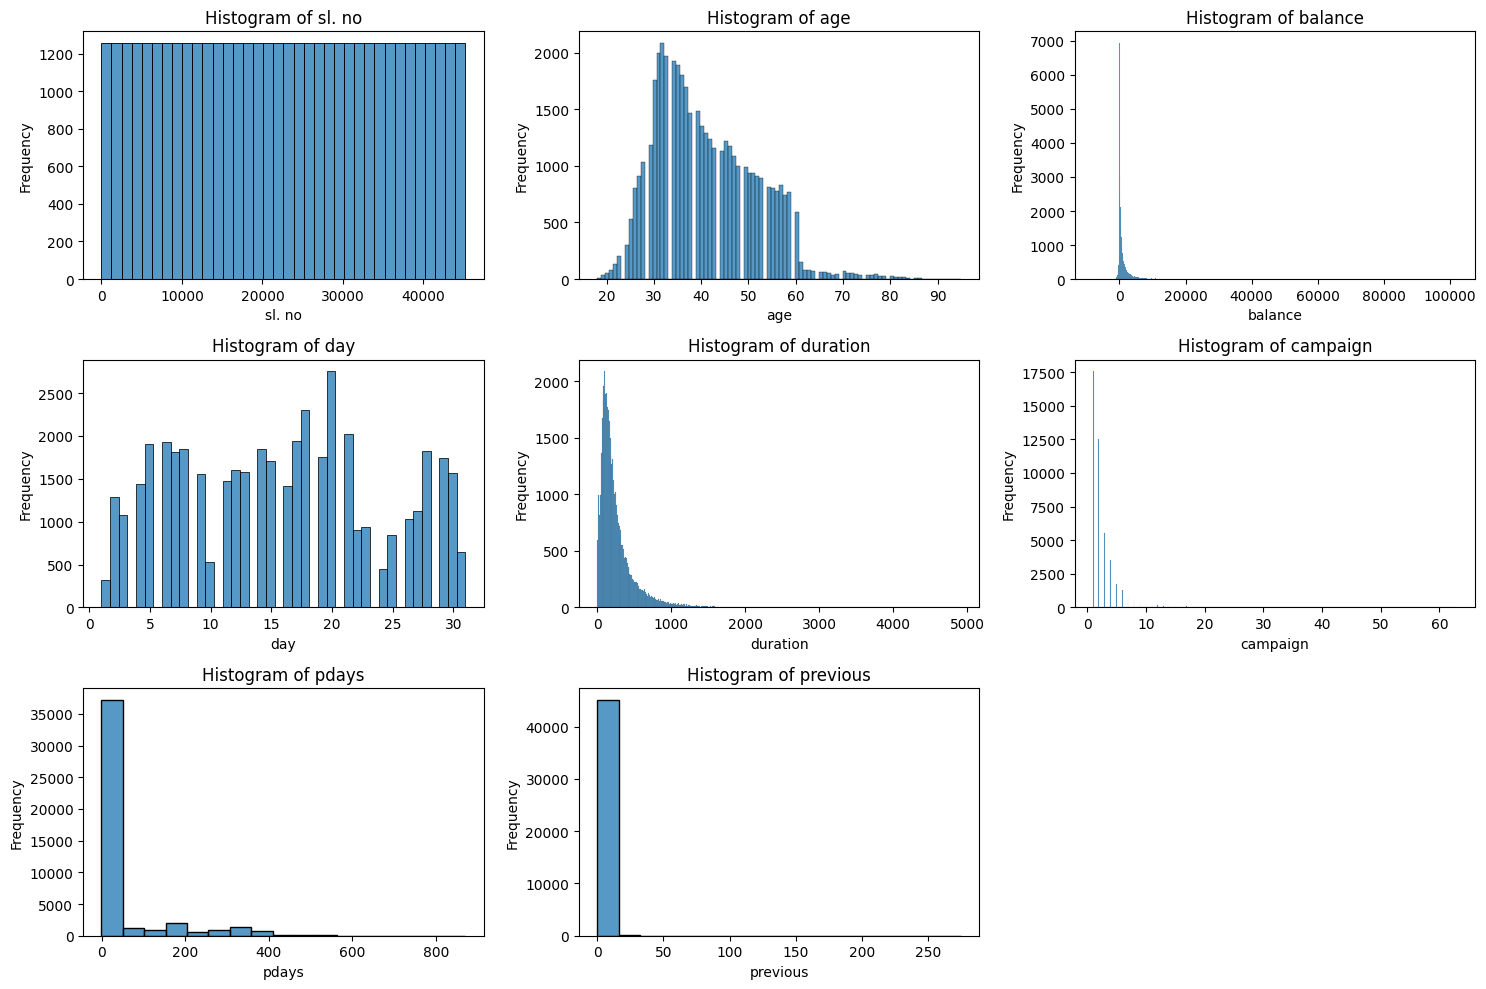

In [18]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Select numerical columns
numeric_columns = Bank_data.select_dtypes(include="number").columns

# Create subplots
num_plots = len(numeric_columns)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plotting each numerical column in a separate subplot
for i, col in enumerate(numeric_columns):
    sns.histplot(data=Bank_data, x=col, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


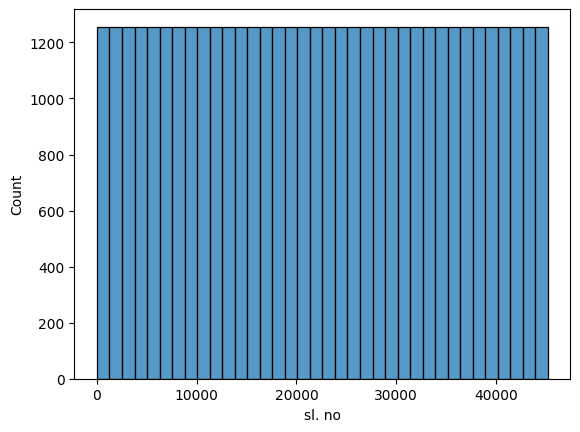

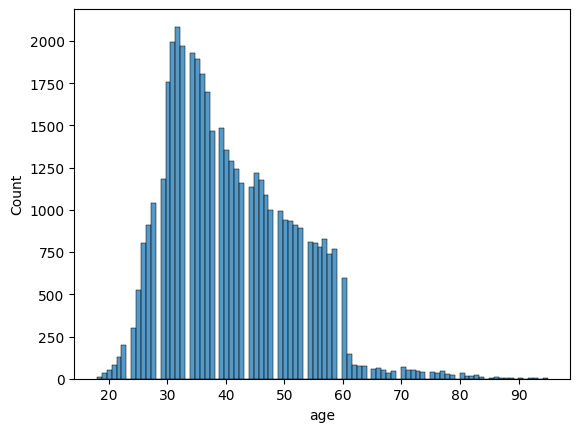

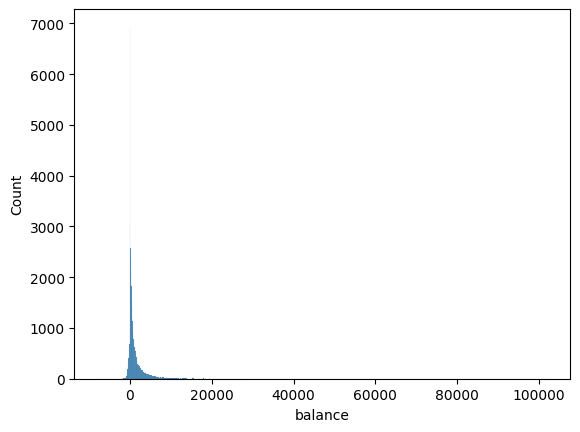

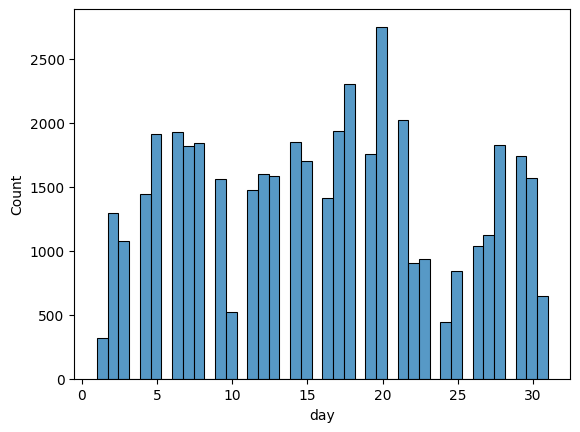

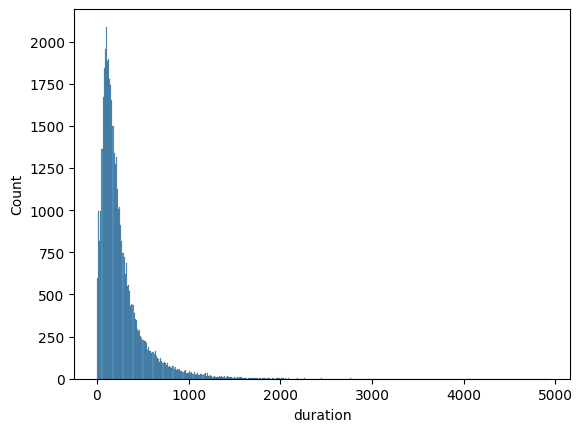

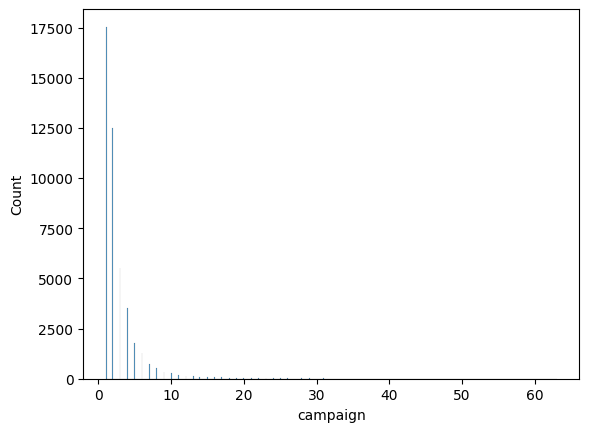

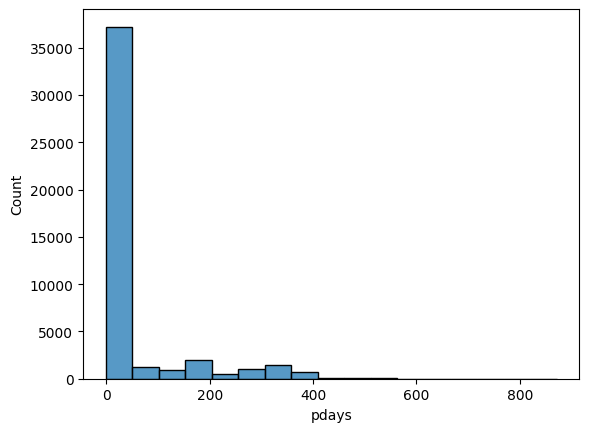

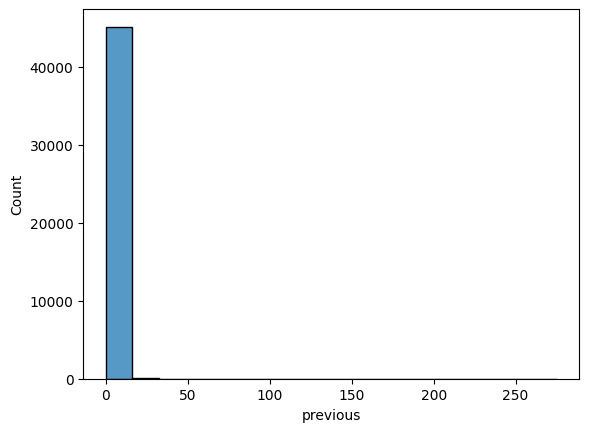

In [19]:
# histogram to understand the distribution
import warnings
warnings.filterwarnings("ignore")
for i in Bank_data.select_dtypes(include="number").columns:
    sns.histplot(data=Bank_data,x=i)
    plt.show()

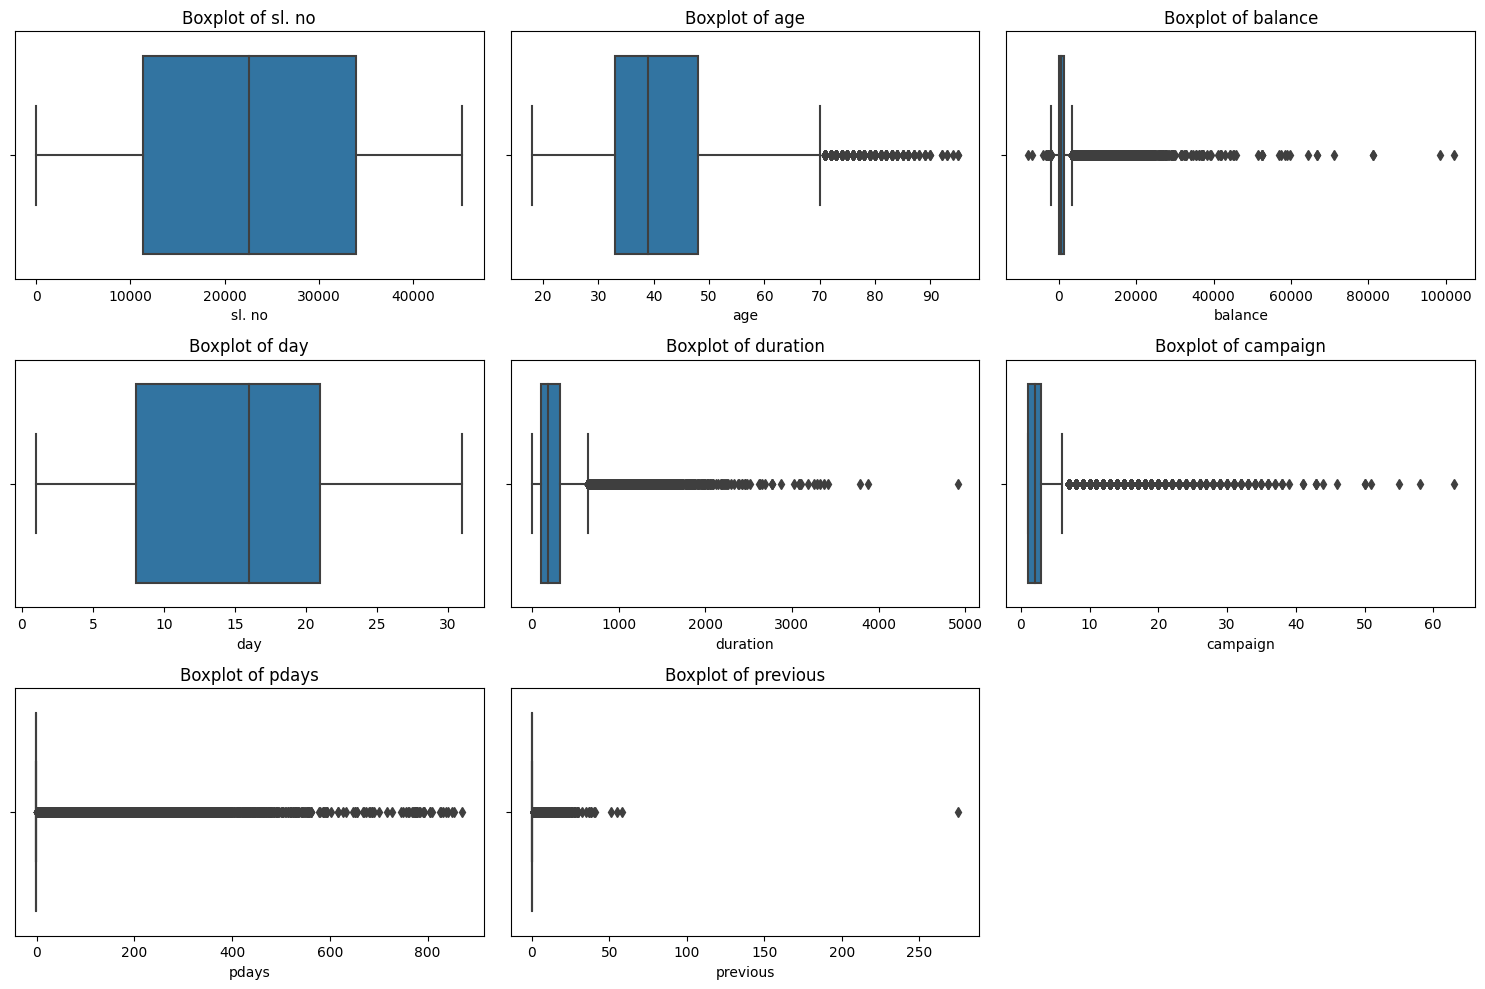

In [20]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Select numerical columns
numeric_columns = Bank_data.select_dtypes(include="number").columns

# Create subplots
num_plots = len(numeric_columns)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plotting each numerical column in a separate subplot
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=Bank_data, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('')

# Remove empty subplots if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


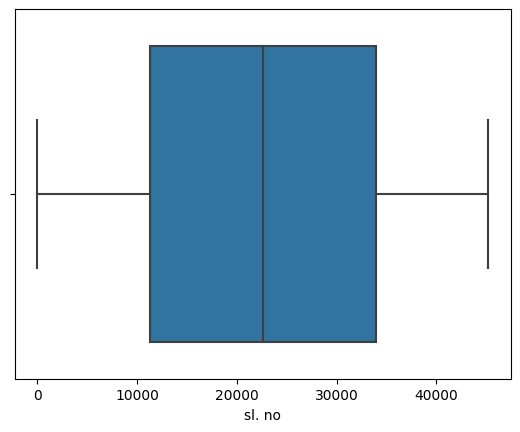

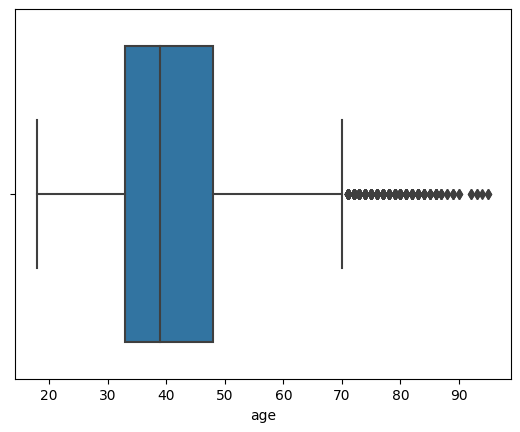

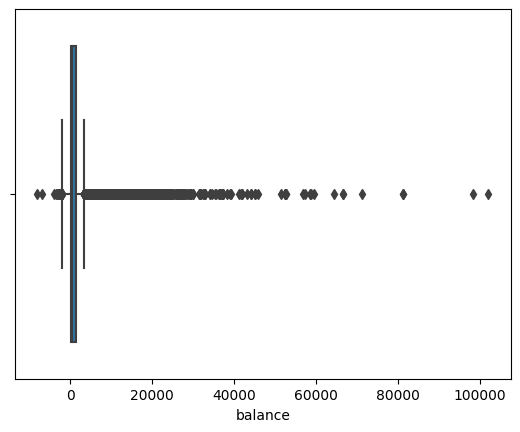

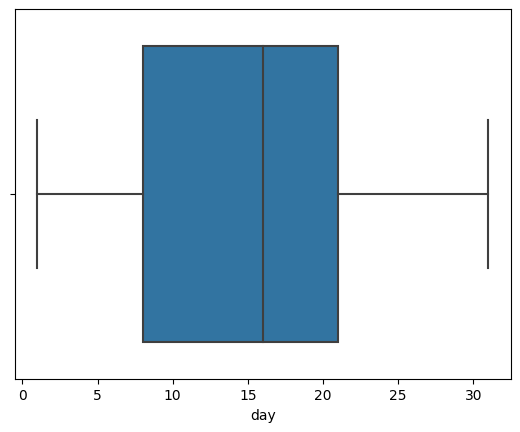

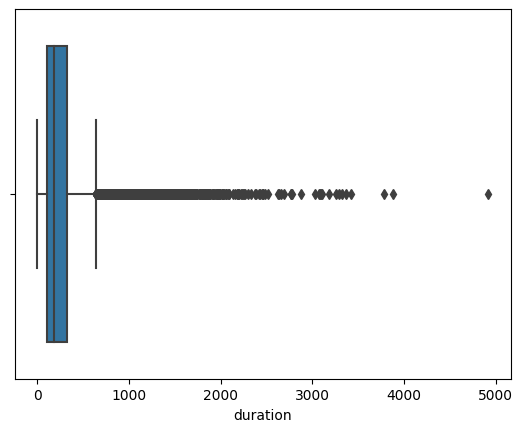

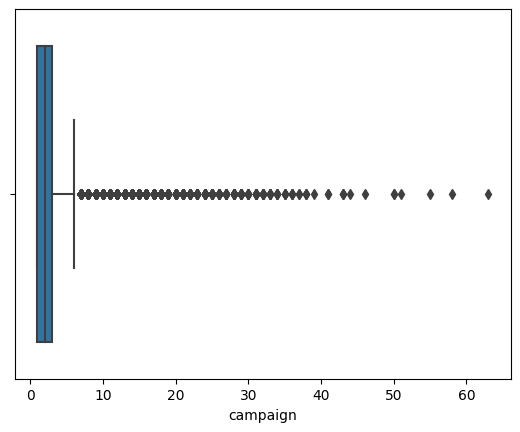

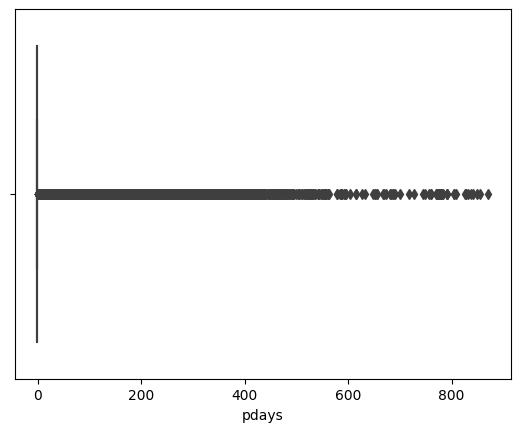

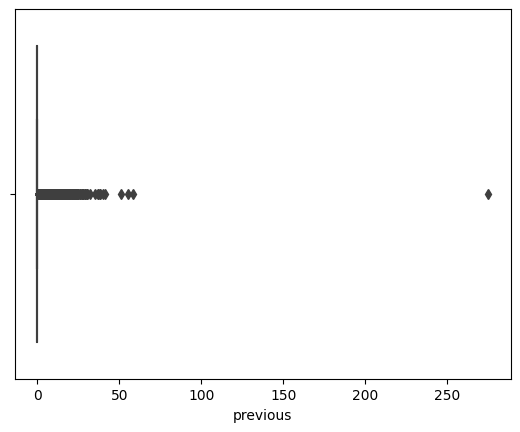

In [21]:
#Identify Outliers
import warnings
warnings.filterwarnings("ignore")
for i in Bank_data.select_dtypes(include="number").columns:
    sns.boxplot(data=Bank_data,x=i)
    plt.show()

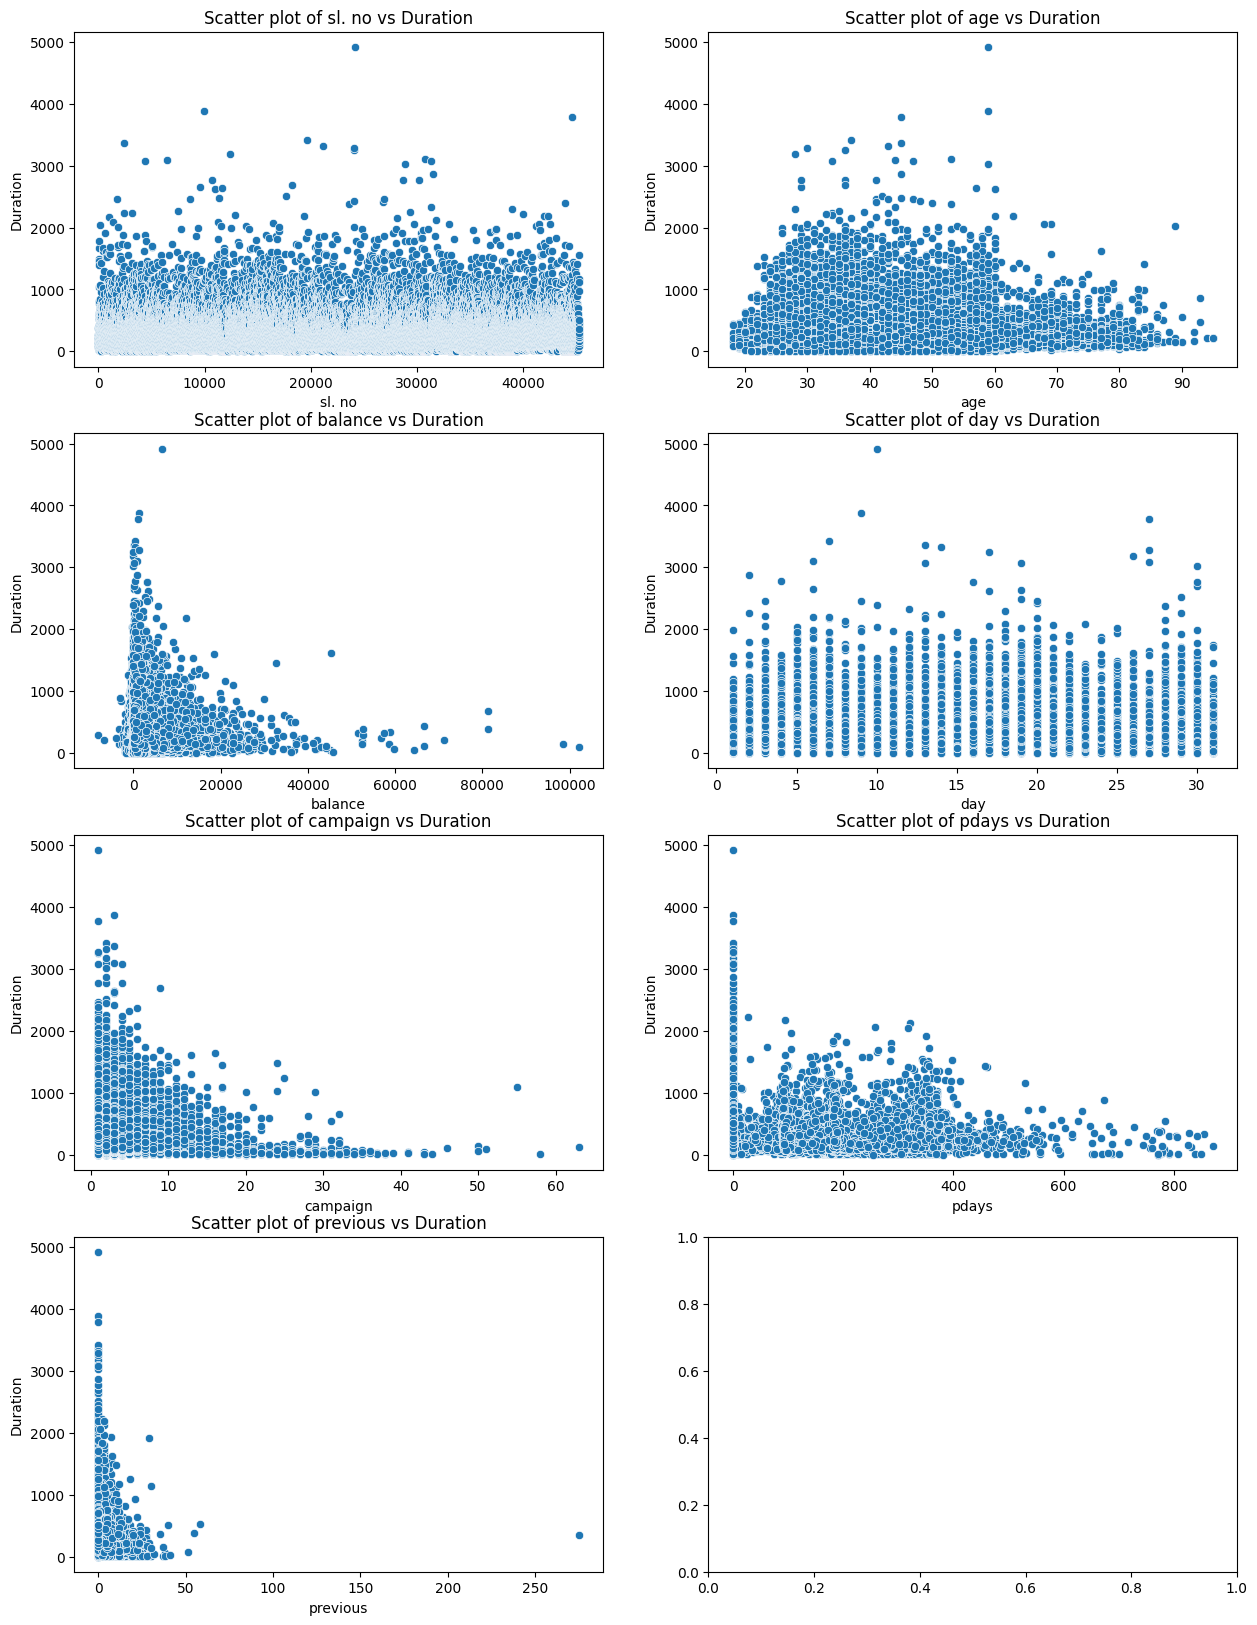

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot
columns = ['sl. no', 'age', 'balance', 'day', 'campaign', 'pdays', 'previous']

# Number of rows and columns for subplots
num_cols = 2  # Number of columns in the subplot grid
num_rows = (len(columns) // num_cols) + (len(columns) % num_cols > 0)  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plotting each scatter plot in a separate subplot
for i, col in enumerate(columns):
    sns.scatterplot(data=Bank_data, x=col, y='duration', ax=axes[i])
    axes[i].set_title(f'Scatter plot of {col} vs Duration')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Duration')

# Remove empty subplots if

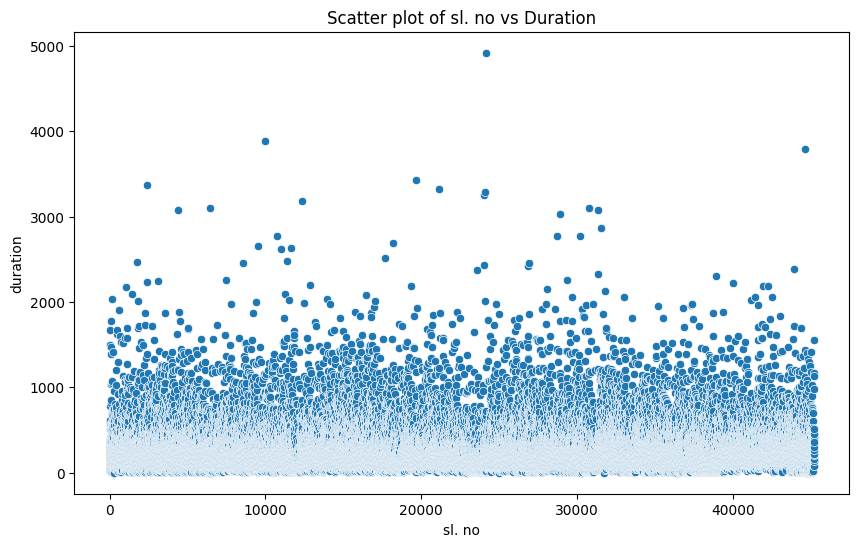

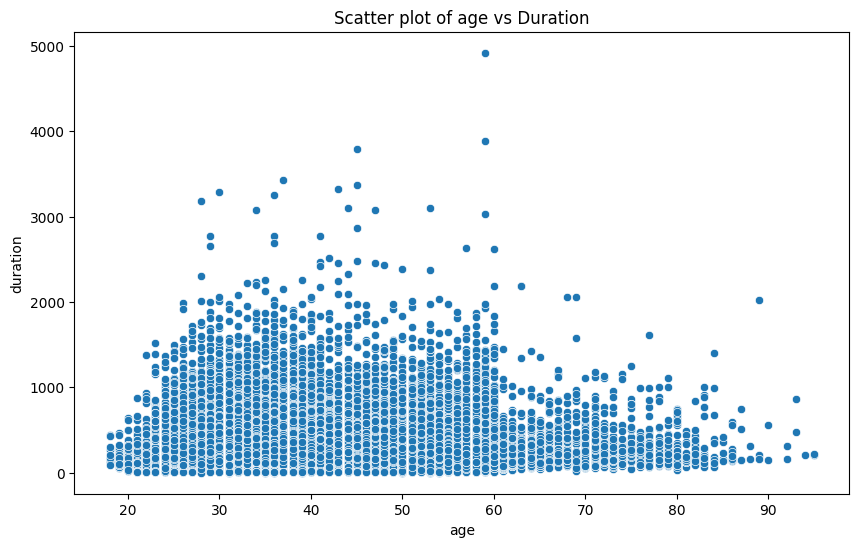

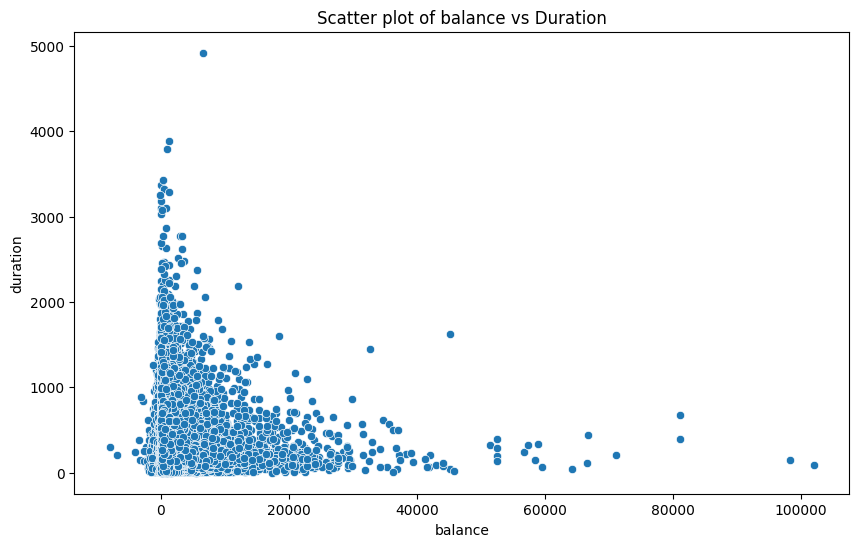

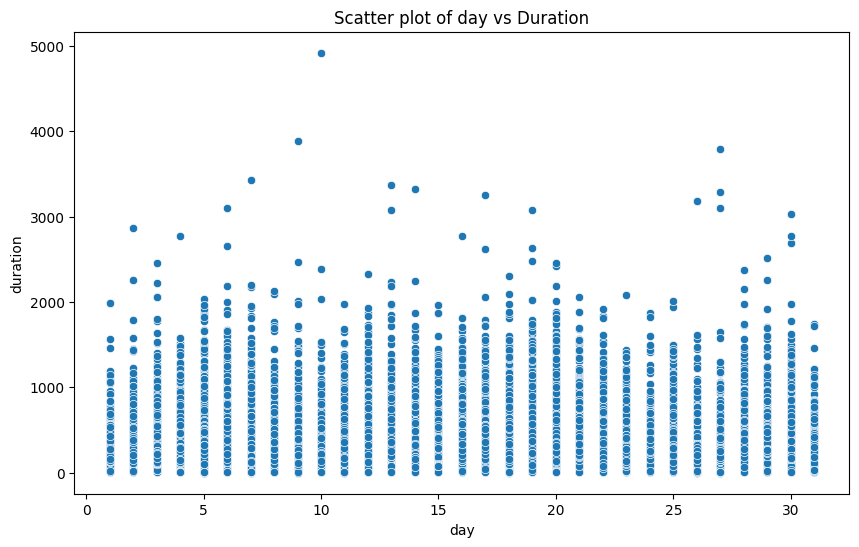

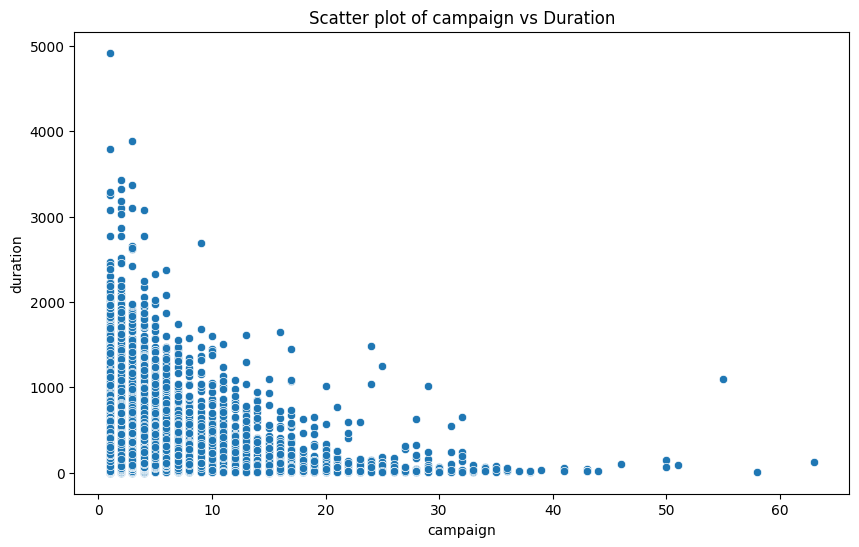

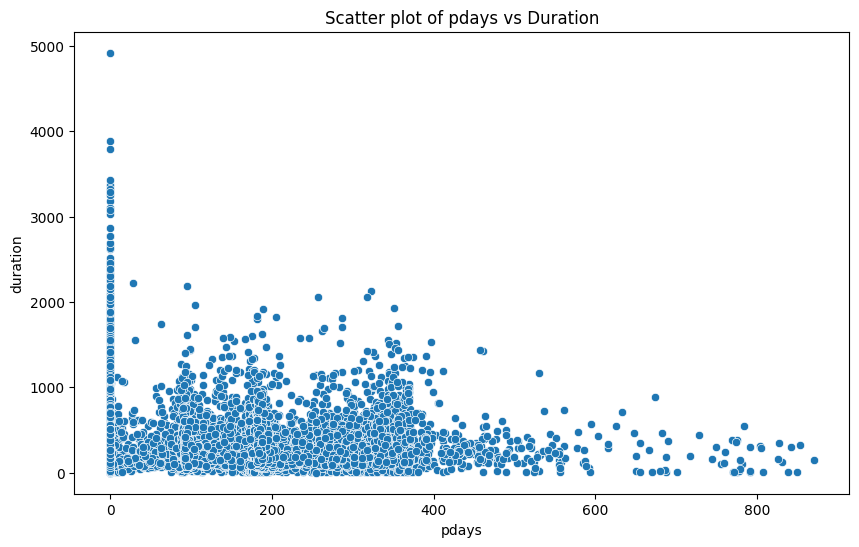

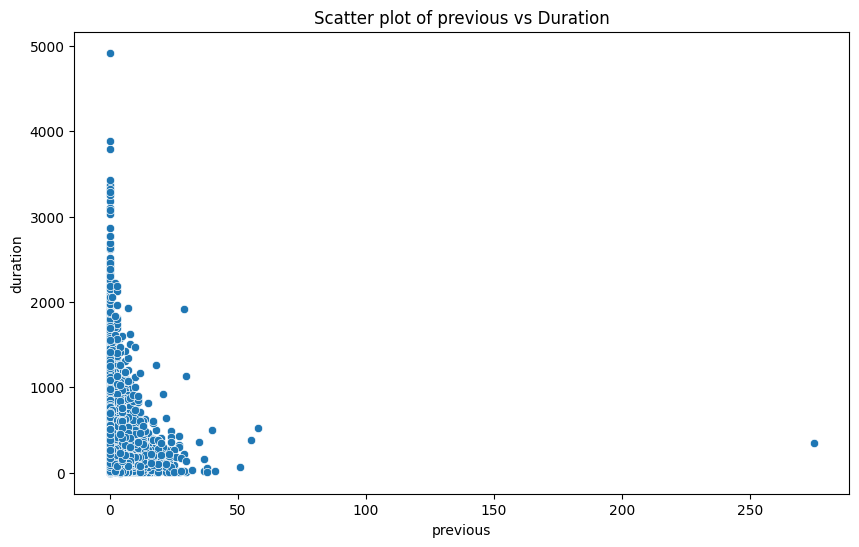

In [23]:
#scatterplot to understand the relationship
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot
columns = ['sl. no', 'age', 'balance', 'day', 'campaign', 'pdays', 'previous']

for i in columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=Bank_data, x=i, y='duration')
    plt.title(f'Scatter plot of {i} vs Duration')
    plt.show()


In [24]:
# correlation with heatmap to interpret the relation and multicolliniarity

# Select numerical columns
numerical_columns = Bank_data.select_dtypes(include='number').columns

# Compute the correlation matrix
correlation_matrix = Bank_data[numerical_columns].corr()

# Display the correlation matrix
print(correlation_matrix)


            sl. no       age   balance       day  duration  campaign  \
sl. no    1.000000  0.014973  0.073639 -0.061465  0.013031 -0.102884   
age       0.014973  1.000000  0.097783 -0.009120 -0.004648  0.004760   
balance   0.073639  0.097783  1.000000  0.004503  0.021560 -0.014578   
day      -0.061465 -0.009120  0.004503  1.000000 -0.030206  0.162490   
duration  0.013031 -0.004648  0.021560 -0.030206  1.000000 -0.084570   
campaign -0.102884  0.004760 -0.014578  0.162490 -0.084570  1.000000   
pdays     0.437729 -0.023758  0.003435 -0.093044 -0.001565 -0.088628   
previous  0.271098  0.001288  0.016674 -0.051710  0.001203 -0.032855   

             pdays  previous  
sl. no    0.437729  0.271098  
age      -0.023758  0.001288  
balance   0.003435  0.016674  
day      -0.093044 -0.051710  
duration -0.001565  0.001203  
campaign -0.088628 -0.032855  
pdays     1.000000  0.454820  
previous  0.454820  1.000000  


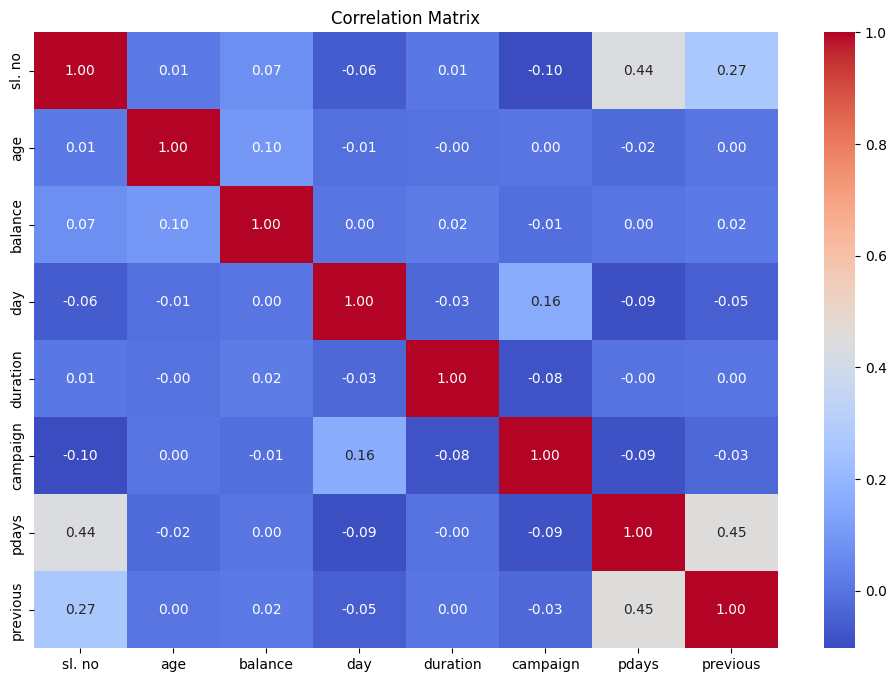

In [25]:
# correlation with heatmap to interpret the relation and multicolliniarity
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Missing value treatments


In [26]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer instance
imputer = SimpleImputer(strategy='most_frequent')

# Iterating through categorical columns and imputing missing values
for col in Bank_data.select_dtypes(include='object').columns:
    Bank_data[col] = imputer.fit_transform(Bank_data[[col]]).ravel()

print(Bank_data.head())  # Display the first few rows of the DataFrame to check the result



   sl. no  age           job  marital  education default  balance housing  \
0       1   58    management  married   tertiary      no     2143     yes   
1       2   44    technician   single  secondary      no       29     yes   
2       3   33  entrepreneur  married  secondary      no        2     yes   
3       4   47   blue-collar  married    unknown      no     1506     yes   
4       5   33       unknown   single    unknown      no        1      no   

  loan  contact  day month  duration  campaign  pdays  previous poutcome   y  
0   no  unknown    5   may       261         1     -1         0  unknown  no  
1   no  unknown    5   may       151         1     -1         0  unknown  no  
2  yes  unknown    5   may        76         1     -1         0  unknown  no  
3   no  unknown    5   may        92         1     -1         0  unknown  no  
4   no  unknown    5   may       198         1     -1         0  unknown  no  


In [27]:
Bank_data.isnull().sum()

sl. no       0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [28]:
Bank_data.select_dtypes(include='number').columns

Index(['sl. no', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')

In [29]:
new_bank_data = Bank_data.sort_values(by='balance', ascending=True)

In [30]:
print(Bank_data.columns)


Index(['sl. no', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')


# From Above EDA Numerical  Columns are **'age'** and **'balance'**. Outliers are Considered for the columns

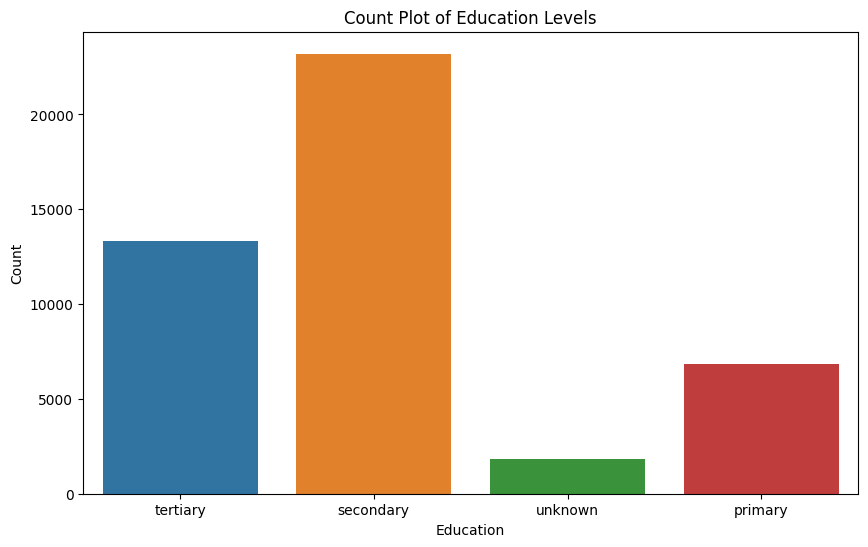

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Bank_data is already defined
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=Bank_data)
plt.title('Count Plot of Education Levels')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()


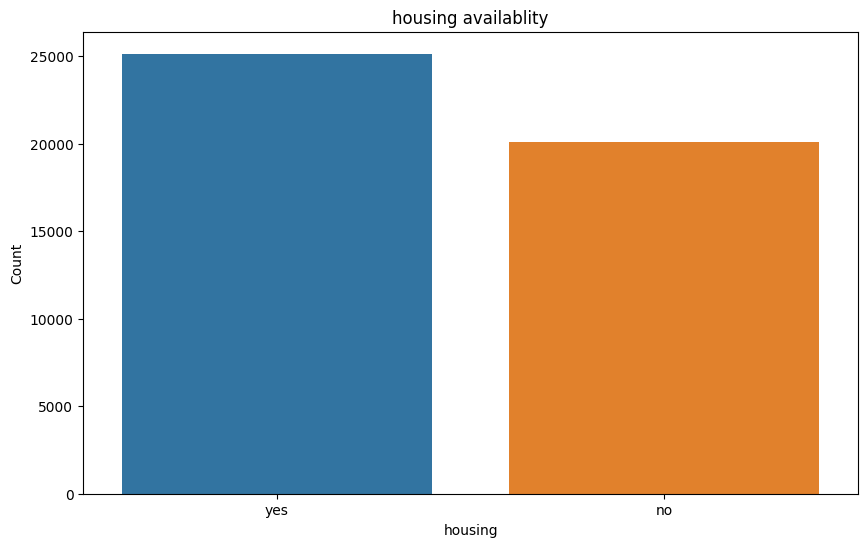

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.countplot(x='housing', data=Bank_data)
plt.title('housing availablity')
plt.xlabel('housing')
plt.ylabel('Count')
plt.show()


# Outlier Detection and Handling

In [33]:
#Outlier Detection and Handling:
#Identify and remove outliers in the 'balance' column:
Q1 = new_bank_data['balance'].quantile(0.25)
Q3 = new_bank_data['balance'].quantile(0.75)
IQR= Q3-Q1

print(Q1)
print(Q3)
print(IQR)

72.0
1428.0
1356.0


In [34]:
#Outlier Detection and Handling:
#Identify and remove outliers in the 'age' column:
Q1 = new_bank_data['age'].quantile(0.25)
Q3 = new_bank_data['age'].quantile(0.75)
IQR= Q3-Q1

print(Q1)
print(Q3)
print(IQR)

33.0
48.0
15.0


In [35]:
import numpy as np

def whisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    up = q3 + 1.5 * iqr
    return lw, up


In [36]:
lw, up = whisker(Bank_data['duration'])
print(f'Lower whisker: {lw}')
print(f'Upper whisker: {up}')


Lower whisker: -221.0
Upper whisker: 643.0


In [37]:
lw, up = whisker(Bank_data['campaign'])
print(f'Lower whisker: {lw}')
print(f'Upper whisker: {up}')


Lower whisker: -2.0
Upper whisker: 6.0


In [38]:
import numpy as np

# Define your DataFrame
df = Bank_data.copy()  # Make a copy of Bank_data to avoid modifying the original

# Define the whisker function if not already defined
def whisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    up = q3 + 1.5 * iqr
    return lw, up

# Loop through the specified columns and apply the whisker limits
for i in ['duration', 'campaign']:
    lw, up = whisker(Bank_data[i])
    df[i] = np.where(Bank_data[i] < lw, lw, Bank_data[i])
    df[i] = np.where(Bank_data[i] > up, up, Bank_data[i])

print(df.head())


   sl. no  age           job  marital  education default  balance housing  \
0       1   58    management  married   tertiary      no     2143     yes   
1       2   44    technician   single  secondary      no       29     yes   
2       3   33  entrepreneur  married  secondary      no        2     yes   
3       4   47   blue-collar  married    unknown      no     1506     yes   
4       5   33       unknown   single    unknown      no        1      no   

  loan  contact  day month  duration  campaign  pdays  previous poutcome   y  
0   no  unknown    5   may     261.0       1.0     -1         0  unknown  no  
1   no  unknown    5   may     151.0       1.0     -1         0  unknown  no  
2  yes  unknown    5   may      76.0       1.0     -1         0  unknown  no  
3   no  unknown    5   may      92.0       1.0     -1         0  unknown  no  
4   no  unknown    5   may     198.0       1.0     -1         0  unknown  no  


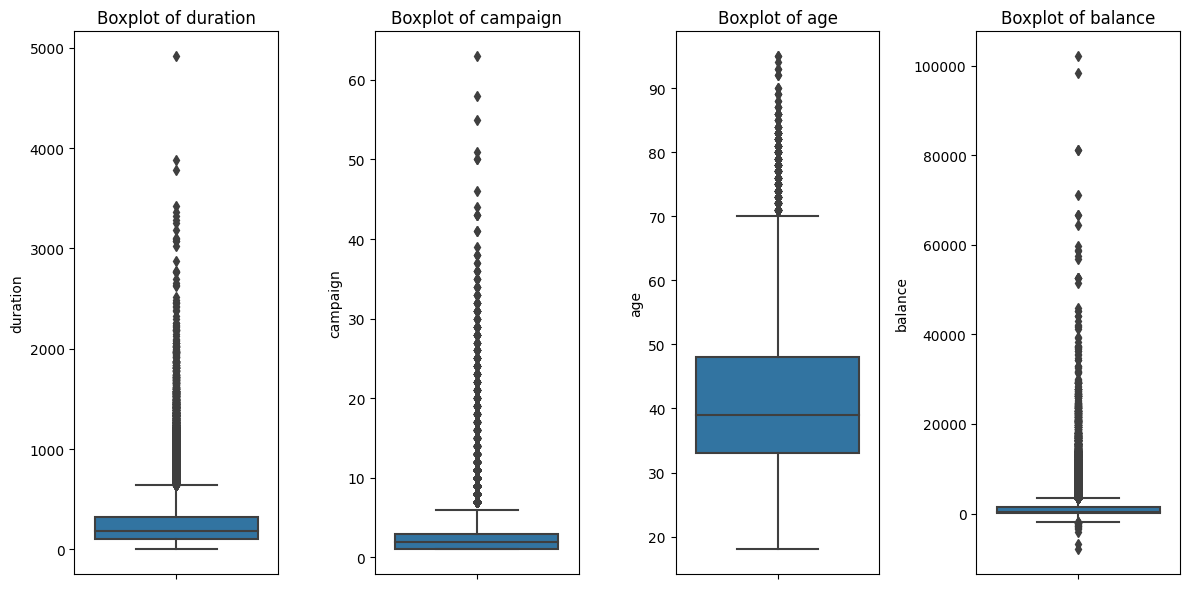

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to create boxplots for
columns = ['duration', 'campaign', 'age', 'balance' ]

# Create boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns, 1):
    plt.subplot(1, len(columns), i)
    sns.boxplot(y=Bank_data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


In [40]:
Bank_data

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Renaming column (Feature Selection)

In [41]:
Bank_data.rename(columns = {'y':'deposited?'}, inplace = True)

In [42]:
from sklearn.model_selection import train_test_split

# Prepare features and target
x = Bank_data.drop(['deposited?'], axis=1)
y =Bank_data['deposited?']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(f'Training data shape: {x_train.shape}, {y_train.shape}')
print(f'Testing data shape: {x_test.shape}, {y_test.shape}')


Training data shape: (31647, 17), (31647,)
Testing data shape: (13564, 17), (13564,)


In [43]:
df_train = x_train.copy()
df_train['deposited?'] = y_train
df_train.head()

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposited?
10747,10748,36,technician,single,tertiary,no,0,no,no,unknown,17,jun,153,4,-1,0,unknown,no
26054,26055,56,entrepreneur,married,secondary,no,196,no,no,cellular,19,nov,312,3,-1,0,unknown,no
9125,9126,46,blue-collar,married,secondary,no,0,yes,no,unknown,5,jun,83,2,-1,0,unknown,no
41659,41660,41,management,divorced,tertiary,no,3426,no,no,cellular,1,oct,302,1,119,5,success,no
4443,4444,38,blue-collar,married,secondary,no,0,yes,no,unknown,20,may,90,1,-1,0,unknown,no


#  Encoding of Data -One Hot Encoding

In [44]:
x = pd.get_dummies(x)
x.columns=[x.lower() for x in x.columns]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3, stratify=y)

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split

x = pd.get_dummies(x)
x.columns = [col.lower() for col in x.columns]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3, stratify=y)

In [46]:
classes=df_train['deposited?'].value_counts()
normal_share=round(classes[0]/df_train['deposited?'].count()*100,2)
fraud_share=round(classes[1]/df_train['deposited?'].count()*100, 2)
print("Non-deposited? : {} %".format(normal_share))
print("deposited? : {} %".format(fraud_share))

Non-deposited? : 88.34 %
deposited? : 11.66 %


In [47]:
x_train=df_train.drop(['deposited?'],axis=1)
y_train=df_train['deposited?']

In [48]:
import pandas as pd

# Assuming `newdataframe` is your original DataFrame containing the 'deposited' column
x = pd.get_dummies(Bank_data.drop(['deposited?'], axis=1))
y = pd.get_dummies(Bank_data['deposited?'], drop_first=True)

# Convert all column names to lowercase
x.columns = [col.lower() for col in x.columns]
y.columns = ['deposited']  # Rename the target column for clarity

print(x.head())  # Display the first few rows of the feature matrix
print(y.head())  # Display the first few rows of the target variable


   sl. no  age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0       1   58     2143    5       261         1     -1         0       False   
1       2   44       29    5       151         1     -1         0       False   
2       3   33        2    5        76         1     -1         0       False   
3       4   47     1506    5        92         1     -1         0       False   
4       5   33        1    5       198         1     -1         0       False   

   job_blue-collar  ...  month_jun  month_mar  month_may  month_nov  \
0            False  ...      False      False       True      False   
1            False  ...      False      False       True      False   
2            False  ...      False      False       True      False   
3             True  ...      False      False       True      False   
4            False  ...      False      False       True      False   

   month_oct  month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0      